In [2]:
### Learning to Classify Text
## This lecture includes supervised classification algorithms specific to Machine Learning that are not only about text data

import nltk

## One more wordlist corpus is the Names corpus, containing 8,000 first names categorized by gender. The male and female names are stored in separate files. Let's find names which appear in both files, i.e. names that are ambiguous for gender

In [3]:
names = nltk.corpus.names
names.fileids()
male_names = names.words('male.txt') ## as usual, run the code in separate lines
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

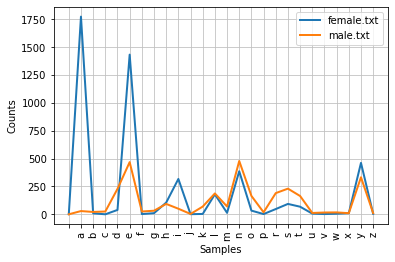

In [5]:
# It is well known that names ending in the letter a are almost always female. We can see this and some other patterns in the graph. Remember that name[-1] is the last letter of name.

cfd = nltk.ConditionalFreqDist(
(fileid, name[-1])
for fileid in names.fileids()
for name in names.words(fileid))
cfd.plot()

In [7]:
# Names ending in a, e and i are likely to be female, while names ending in k, o, r, s and t are likely to be male. Let's build a classifier to model these differences more precisely.
# The first step in creating a classifier is deciding what features of the input are relevant, and how to encode those features. For this example, we'll start by just looking at the final letter of a given name. 
# The following feature extractor function builds a dictionary containing relevant information about a given name:

def gender_features(word):
    return {'last_letter': word[-1]}

gender_features('Shrek')

{'last_letter': 'k'}

In [8]:
# The returned dictionary, known as a feature set, maps from feature names to their values. Feature names are case-sensitive strings that typically provide a short human-readable description of the feature, as in the example 'last_letter'. 
# Feature values are values with simple types, such as booleans, numbers, and strings.
# Now that we've defined a feature extractor, we need to prepare a list of examples and corresponding class labels.

from nltk.corpus import names
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
    [(name, 'female') for name in names.words('female.txt')])
import random
random.shuffle(labeled_names)

In [9]:
# Next, we use the feature extractor to process the names data, and divide the resulting list of feature sets into a training set and a test set.

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [10]:
# Let's test this:

classifier.classify(gender_features('Neo'))
classifier.classify(gender_features('Trinity'))

'female'

In [11]:
# We can systematically evaluate the classifier on a much larger quantity of unseen data:

print(nltk.classify.accuracy(classifier, test_set))

0.776


In [12]:
# we can examine the classifier to determine which features it found most effective for distinguishing the names' genders:

classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'a'            female : male   =     33.3 : 1.0
             last_letter = 'k'              male : female =     32.0 : 1.0
             last_letter = 'f'              male : female =     17.2 : 1.0
             last_letter = 'p'              male : female =     12.5 : 1.0
             last_letter = 'v'              male : female =      9.8 : 1.0


In [13]:
# This listing shows that the names in the training set that end in "a" are female 33 times more often than they are male, but names that end in "k" are male 32 times more often than they are female. These ratios are known as likelihood ratios, and can be useful for comparing different feature-outcome relationships.

# When working with large corpora, constructing a single list that contains the features of every instance can use up a large amount of memory. In these cases, use the function nltk.classify.apply_features, which returns an object that acts like a list but does not store all the feature sets in memory:

from nltk.classify import apply_features
train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])

In [15]:
## CHOOSING THE RIGHT FEATURES

# Selecting relevant features and deciding how to encode them for a learning method can have an enormous impact on the learning method's ability to extract a good model. 
# Much of the interesting work in building a classifier is deciding what features might be relevant, and how we can represent them. Although it's often possible to get decent performance by using a fairly simple and obvious set of features, there are usually significant gains to be had by using carefully constructed features based on a thorough understanding of the task at hand.
# Typically, feature extractors are built through a process of trial-and-error, guided by intuitions about what information is relevant to the problem. It's common to start with a "kitchen sink" approach, including all the features that you can think of, and then checking to see which features actually are helpful. 

def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

gender_features2('John') 

{'first_letter': 'j',
 'last_letter': 'n',
 'count(a)': 0,
 'has(a)': False,
 'count(b)': 0,
 'has(b)': False,
 'count(c)': 0,
 'has(c)': False,
 'count(d)': 0,
 'has(d)': False,
 'count(e)': 0,
 'has(e)': False,
 'count(f)': 0,
 'has(f)': False,
 'count(g)': 0,
 'has(g)': False,
 'count(h)': 1,
 'has(h)': True,
 'count(i)': 0,
 'has(i)': False,
 'count(j)': 1,
 'has(j)': True,
 'count(k)': 0,
 'has(k)': False,
 'count(l)': 0,
 'has(l)': False,
 'count(m)': 0,
 'has(m)': False,
 'count(n)': 1,
 'has(n)': True,
 'count(o)': 1,
 'has(o)': True,
 'count(p)': 0,
 'has(p)': False,
 'count(q)': 0,
 'has(q)': False,
 'count(r)': 0,
 'has(r)': False,
 'count(s)': 0,
 'has(s)': False,
 'count(t)': 0,
 'has(t)': False,
 'count(u)': 0,
 'has(u)': False,
 'count(v)': 0,
 'has(v)': False,
 'count(w)': 0,
 'has(w)': False,
 'count(x)': 0,
 'has(x)': False,
 'count(y)': 0,
 'has(y)': False,
 'count(z)': 0,
 'has(z)': False}

In [16]:
# However, there are usually limits to the number of features that you should use with a given learning algorithm — if you provide too many features, then the algorithm will have a higher chance of relying on idiosyncrasies of your training data that don't generalize well to new examples. This problem is known as overfitting, and can be especially problematic when working with small training sets.

featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.782


In [17]:
# Once an initial set of features has been chosen, a very productive method for refining the feature set is error analysis. First, we select a development set, containing the corpus data for creating the model. This development set is then subdivided into the training set and the dev-test set.

train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

In [20]:
# Having divided the corpus into appropriate datasets, we train a model using the training set, and then run it on the dev-test se

train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.739


In [25]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name))
        
for (tag, guess, name) in sorted(errors):
        print('correct={:<8} guess={:<8s} name={:<30}'.format(tag, guess, name))

correct=female   guess=male     name=Abagail                       
correct=female   guess=male     name=Adriaens                      
correct=female   guess=male     name=Aeriell                       
correct=female   guess=male     name=Alison                        
correct=female   guess=male     name=Amabel                        
correct=female   guess=male     name=Arden                         
correct=female   guess=male     name=Arlyn                         
correct=female   guess=male     name=Averyl                        
correct=female   guess=male     name=Avis                          
correct=female   guess=male     name=Avril                         
correct=female   guess=male     name=Barb                          
correct=female   guess=male     name=Beatriz                       
correct=female   guess=male     name=Beau                          
correct=female   guess=male     name=Bird                          
correct=female   guess=male     name=Brandais   

In [28]:
## Looking through this list of errors makes it clear that some suffixes that are more than one letter can be indicative of name genders. For example, names ending in yn appear to be predominantly female, despite the fact that names ending in n tend to be male; and names ending in ch are usually male, even though names that end in h tend to be female. We therefore adjust our feature extractor to include features for two-letter suffixes:

def gender_features(word):
    return {'suffix1': word[-1:],
        'suffix2': word[-2:]}

train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set)) ## Our accuracy has increased

0.766


In [30]:
## Document Classification
# We can build classifiers that will automatically tag new documents with appropriate category labels. First, we construct a list of documents, labeled with the appropriate categories. For this example, we've chosen the Movie Reviews Corpus, which categorizes each review as positive or negative.

from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
        for category in movie_reviews.categories()
        for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [31]:
# Next, we define a feature extractor for documents, so the classifier will know which aspects of the data it should pay attention to. 
# For document topic identification, we can define a feature for each word, indicating whether the document contains that word. To limit the number of features that the classifier needs to process, we begin by constructing a list of the 2000 most frequent words in the overall corpus.
# We can then define a feature extractor that simply checks whether each of these words is present in a given document.

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000] # [_document-classify-all-words]

def document_features(document): # [_document-classify-extractor]
    document_words = set(document) # [_document-classify-set]
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [32]:
print(document_features(movie_reviews.words('pos/cv957_8737.txt'))) 

{'contains(plot)': True, 'contains(:)': True, 'contains(two)': True, 'contains(teen)': False, 'contains(couples)': False, 'contains(go)': False, 'contains(to)': True, 'contains(a)': True, 'contains(church)': False, 'contains(party)': False, 'contains(,)': True, 'contains(drink)': False, 'contains(and)': True, 'contains(then)': True, 'contains(drive)': False, 'contains(.)': True, 'contains(they)': True, 'contains(get)': True, 'contains(into)': True, 'contains(an)': True, 'contains(accident)': False, 'contains(one)': True, 'contains(of)': True, 'contains(the)': True, 'contains(guys)': False, 'contains(dies)': False, 'contains(but)': True, 'contains(his)': True, 'contains(girlfriend)': True, 'contains(continues)': False, 'contains(see)': False, 'contains(him)': True, 'contains(in)': True, 'contains(her)': False, 'contains(life)': False, 'contains(has)': True, 'contains(nightmares)': False, 'contains(what)': True, "contains(')": True, 'contains(s)': True, 'contains(deal)': False, 'contains

In [33]:
# Now that we've defined our feature extractor, we can use it to train a classifier to label new movie reviews.
# To check how reliable the resulting classifier is, we compute its accuracy on the test set. And once again, we can use show_most_informative_features() to find out which features the classifier found to be most informative

featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [34]:
print(nltk.classify.accuracy(classifier, test_set))

0.81


In [35]:
classifier.show_most_informative_features(5)

Most Informative Features
        contains(suvari) = True              neg : pos    =      7.1 : 1.0
 contains(unimaginative) = True              neg : pos    =      7.1 : 1.0
          contains(mena) = True              neg : pos    =      7.1 : 1.0
        contains(shoddy) = True              neg : pos    =      7.1 : 1.0
     contains(atrocious) = True              neg : pos    =      6.7 : 1.0
